In [97]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set seaborn theme
sns.set(style="white")

# read data
Carprice = pd.read_csv(r"E:\LR 11\CarPrice_assignment.csv")

In [98]:
Carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [99]:
Carprice.CarName.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [100]:
# seperating the carname and company name
CarCompany = Carprice['CarName'].apply(lambda x : x.split(' ')[0])
CarCompany.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [101]:
#Inserting company name in main data
Carprice['CarCompany'] = CarCompany
Carprice1 = Carprice
Carprice1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [102]:
#Dropping Car name and Car_ID for further analysis
Carprice2 = Carprice1.drop(columns=['CarName','car_ID'])
Carprice2.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [103]:
#Correcting the spellings of some car company.
Carprice2['CarCompany'] = Carprice2['CarCompany'].replace({'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen','vw':'volkswagen','Nissan':'nissan'})

In [104]:
Carprice2.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [105]:
Carprice2.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [106]:
#Getting the categorical data.
cat_Carprice2 = Carprice2.select_dtypes(include=['object']).copy()
cat_Carprice2.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompany
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero


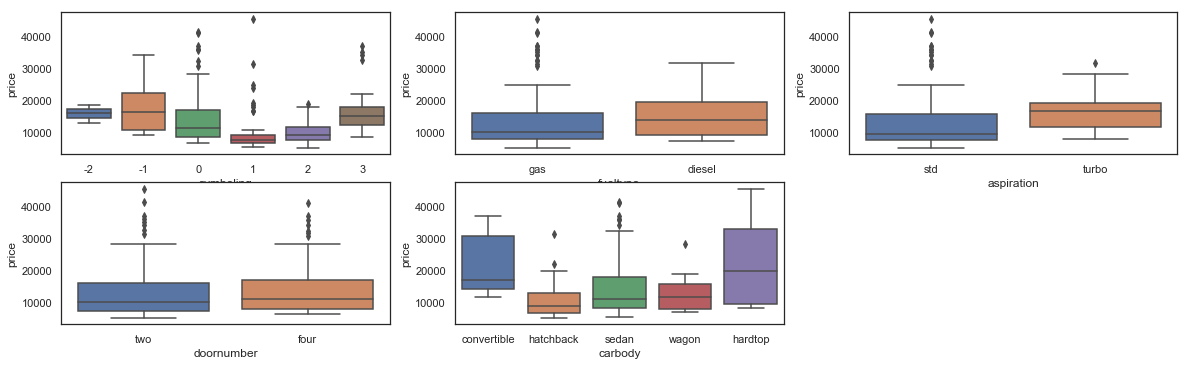

In [107]:
#Visualising Categorical data

plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='symboling',y ='price',data = Carprice2 )
plt.subplot(4,3,2)
sns.boxplot(x ='fueltype',y ='price',data = Carprice2 )
plt.subplot(4,3,3)
sns.boxplot(x ='aspiration',y ='price',data = Carprice2 )
plt.subplot(4,3,4)
sns.boxplot(x ='doornumber',y ='price',data = Carprice2 )
plt.subplot(4,3,5)
sns.boxplot(x ='carbody',y ='price',data = Carprice2 )

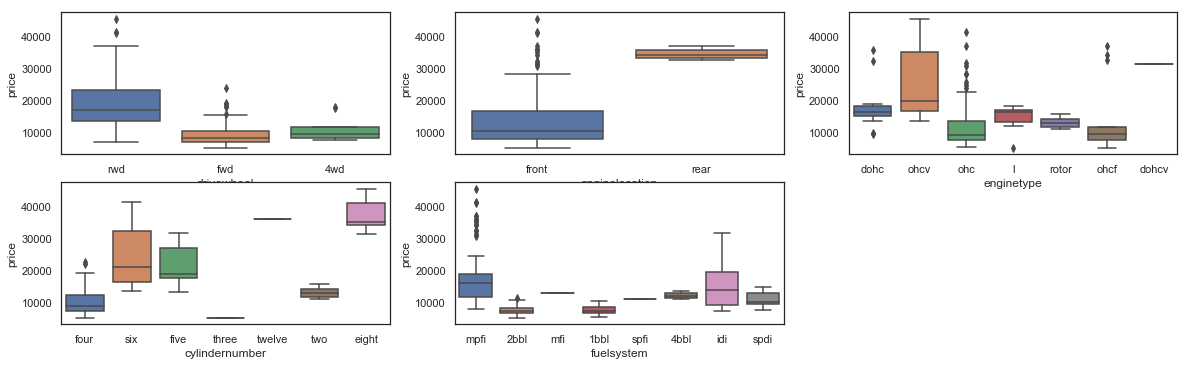

In [108]:
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='drivewheel',y ='price',data = Carprice2 )
plt.subplot(4,3,2)
sns.boxplot(x ='enginelocation',y ='price',data = Carprice2 )
plt.subplot(4,3,3)
sns.boxplot(x ='enginetype',y ='price',data = Carprice2 )
plt.subplot(4,3,4)
sns.boxplot(x ='cylindernumber',y ='price',data = Carprice2 )
plt.subplot(4,3,5)
sns.boxplot(x ='fuelsystem',y ='price',data = Carprice2 )

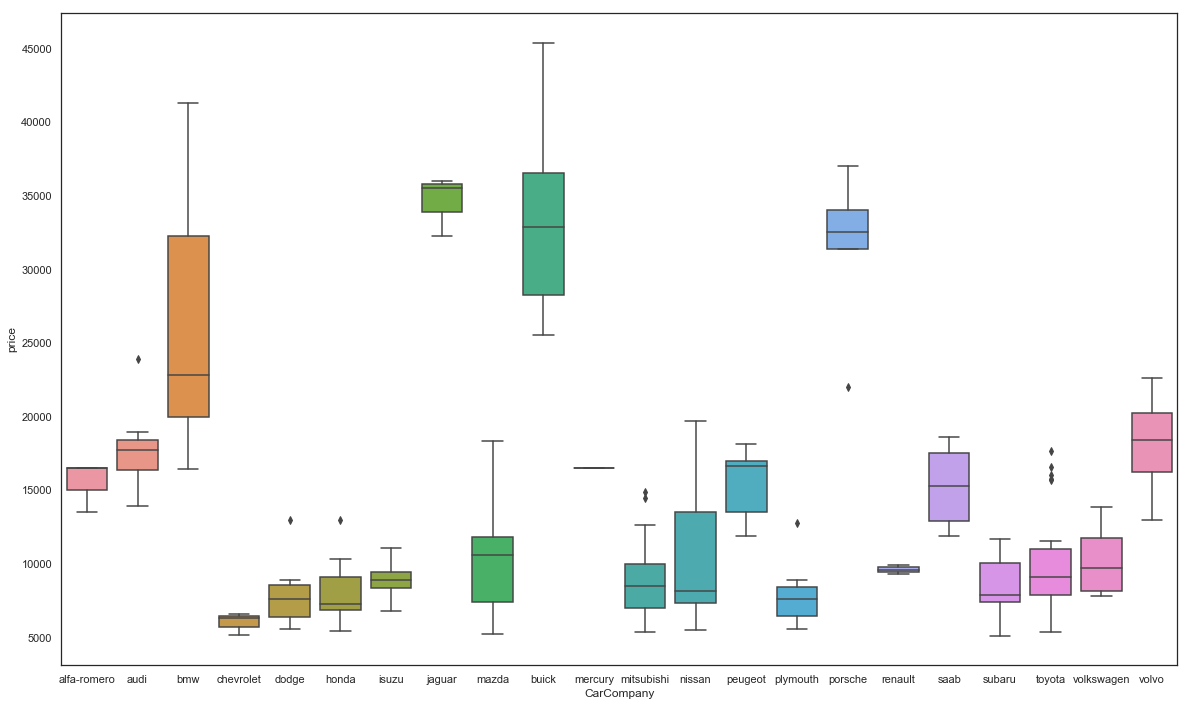

In [109]:
plt.figure(figsize = (20,12))
sns.boxplot(x ='CarCompany',y ='price',data = Carprice2 )

In [110]:
##From the above boxplot we can observe below inferences:
#The cars with -1 symboling seems to be high priced.
#dhcv engine covers the most price range.
#Cars with the eight cylindernumber has the highest price range.
#Diesel car seems to be some high priced.

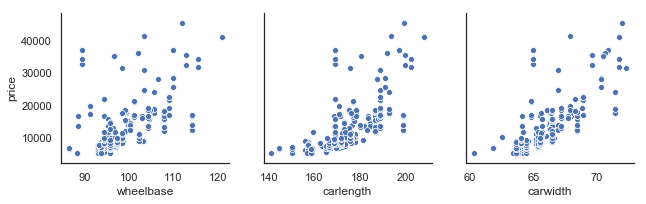

In [111]:
#Visualising Numerical data
sns.pairplot(Carprice2, x_vars=['wheelbase','carlength','carwidth'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

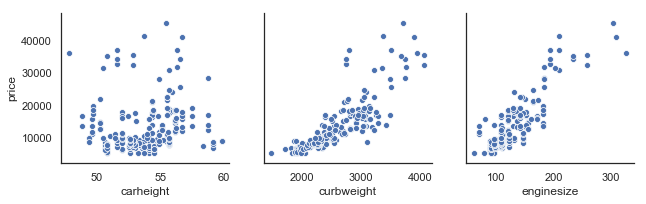

In [112]:
sns.pairplot(Carprice2, x_vars=['carheight','curbweight','enginesize'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

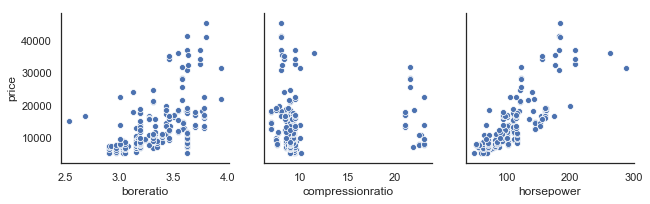

In [113]:
sns.pairplot(Carprice2, x_vars=['boreratio','compressionratio','horsepower'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

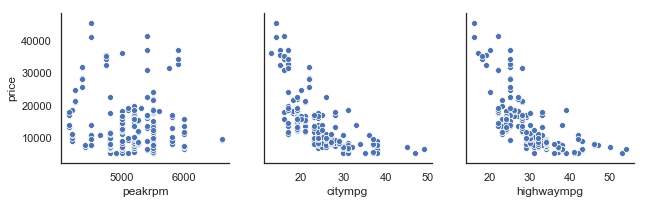

In [114]:
sns.pairplot(Carprice2, x_vars=['peakrpm','citympg','highwaympg'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

In [115]:
#From the above pairplot we can observe below inferences:
#we found that 'wheelbase','carlength','carwidth''curbweight','enginesize''boreratio','horsepower' have high correlation with price.
#and 'carheight','peakrpm','citympg','highwaympg' seems to have a negative correlation with price.




#The variables which seems to be important are-

#aspiration
#carbody
#carwidth
#carlength
#drivewheel
#wheelbase
#curbweight
#horsepower
#enginetype
#cylindernumber
#enginesize
#boreratio

In [116]:
carprice2_mlr = Carprice2[['price','aspiration','carbody','carwidth','carlength','drivewheel','wheelbase','curbweight','horsepower','enginetype','cylindernumber','enginesize','boreratio','fueltype']]

In [117]:
carprice2_mlr.head()

,price,aspiration,carbody,carwidth,carlength,drivewheel,wheelbase,curbweight,horsepower,enginetype,cylindernumber,enginesize,boreratio,fueltype
0,13495.0,std,convertible,64.1,168.8,rwd,88.6,2548,111,dohc,four,130,3.47,gas
1,16500.0,std,convertible,64.1,168.8,rwd,88.6,2548,111,dohc,four,130,3.47,gas
2,16500.0,std,hatchback,65.5,171.2,rwd,94.5,2823,154,ohcv,six,152,2.68,gas
3,13950.0,std,sedan,66.2,176.6,fwd,99.8,2337,102,ohc,four,109,3.19,gas
4,17450.0,std,sedan,66.4,176.6,4wd,99.4,2824,115,ohc,five,136,3.19,gas


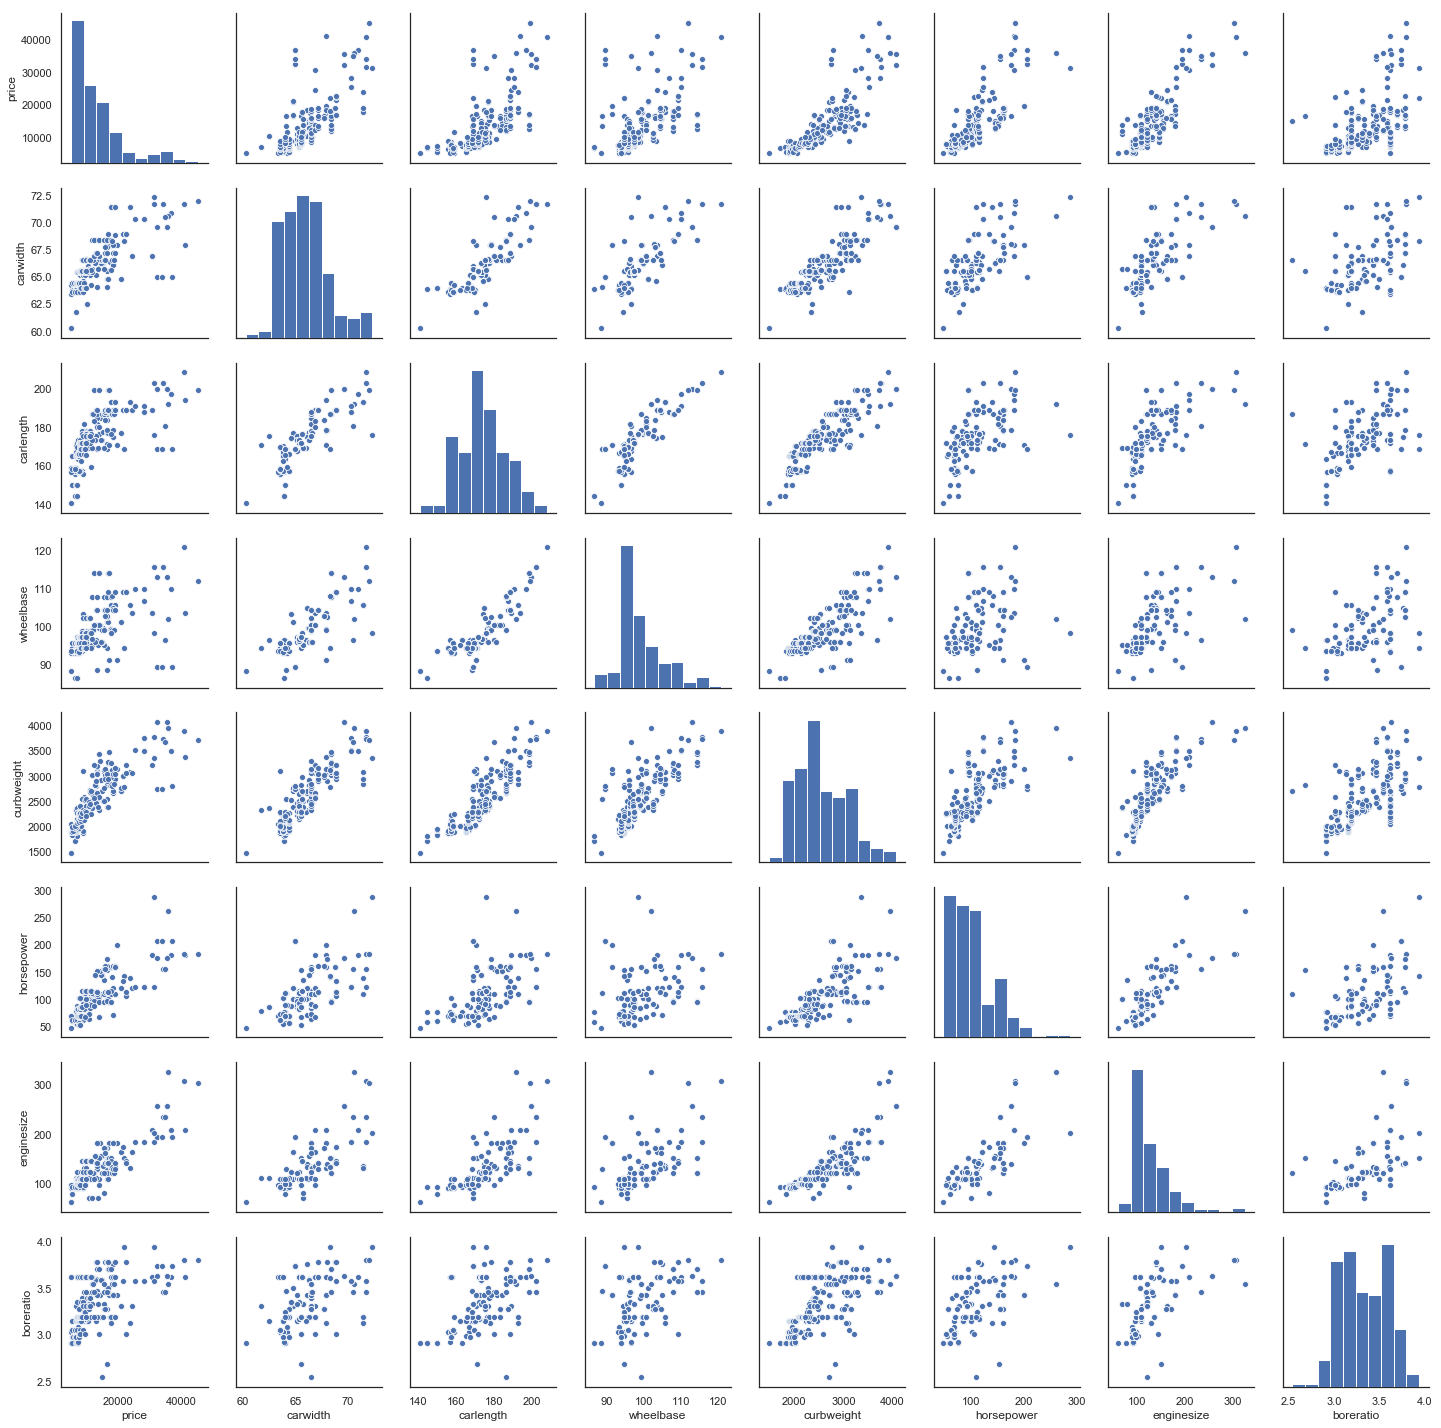

In [118]:
sns.pairplot(carprice2_mlr)
plt.show()

In [119]:
cars_dummy = pd.get_dummies(carprice2_mlr,columns=['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber'],drop_first = True)

In [120]:
cars_dummy.head()

,price,carwidth,carlength,wheelbase,curbweight,horsepower,enginesize,boreratio,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,64.1,168.8,88.6,2548,111,130,3.47,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,64.1,168.8,88.6,2548,111,130,3.47,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,65.5,171.2,94.5,2823,154,152,2.68,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,66.2,176.6,99.8,2337,102,109,3.19,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,66.4,176.6,99.4,2824,115,136,3.19,1,0,...,1,0,0,0,1,0,0,0,0,0


In [121]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(cars_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [122]:
#Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [123]:
car_vars = ['carwidth', 'carlength', 'wheelbase', 'curbweight', 'horsepower','enginesize','boreratio','price']

df_train[car_vars] = scaler.fit_transform(df_train[car_vars])

df_train.head()

,price,carwidth,carlength,wheelbase,curbweight,horsepower,enginesize,boreratio,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,0.068818,0.291667,0.426016,0.244828,0.272692,0.083333,0.139623,0.230159,1,0,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.666667,0.452033,0.272414,0.500388,0.395833,0.339623,1.000000,1,0,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.308333,0.448780,0.272414,0.314973,0.266667,0.139623,0.444444,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.316667,0.450407,0.068966,0.411171,0.262500,0.260377,0.626984,1,0,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.575000,0.775610,0.610345,0.647401,0.475000,0.260377,0.746032,1,1,...,1,0,0,0,0,1,0,0,0,0


In [124]:
df_train.describe()

,price,carwidth,carlength,wheelbase,curbweight,horsepower,enginesize,boreratio,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.461655,0.525476,0.411141,0.407878,0.227302,0.241351,0.497946,0.909091,0.181818,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.184517,0.204848,0.205581,0.211269,0.165511,0.154619,0.207140,0.288490,0.387050,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.304167,0.399187,0.272414,0.245539,0.091667,0.135849,0.305556,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.425000,0.502439,0.341379,0.355702,0.191667,0.184906,0.500000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.550000,0.669919,0.503448,0.559542,0.283333,0.301887,0.682540,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
y_train = df_train.pop('price')
X_train = df_train

In [126]:
carprice2_mlr.columns

Index(['price', 'aspiration', 'carbody', 'carwidth', 'carlength', 'drivewheel',
       'wheelbase', 'curbweight', 'horsepower', 'enginetype', 'cylindernumber',
       'enginesize', 'boreratio', 'fueltype'],
      dtype='object')

In [127]:
#Implementing model building
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     49.55
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           5.88e-51
Time:                        21:43:33   Log-Likelihood:                 195.25
No. Observations:                 143   AIC:                            -336.5
Df Residuals:                     116   BIC:                            -256.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1973      0.126      1.563      0.121      -0.053       0.447
carwidth                  0.2195      0.105      2.083      0.039       0.011       0.428
carlength                -0.1503      0.110     -1.361      0.176      -0.369       0.068
wheelbase                 0.1023      0.091      1.121      0.265      -0.078       0.283
curbweight                0.2144      0.162      1.325      0.188      -0.106       0.535
horsepower                0.5825      0.149      3.900      0.000       0.287       0.878
enginesize                0.3189      0.222      1.435      0.154      -0.121       0.759
boreratio                -0.0598      0.087     -0.691      0.491      -0.231       0.112
fueltype_gas             -0.0663      0.034     -1.942      0.055      -0.134       0.001
aspiration_turbo         -0.0294      0.026     -1.119      0.265      -0.082       0.023
carbody_hardtop          -0.1164      0.063     -1.843      0.068      -0.242       0.009
carbody_hatchback        -0.1573      0.047     -3.347      0.001      -0.250      -0.064
carbody_sedan            -0.1164      0.049     -2.363      0.020      -0.214      -0.019
carbody_wagon            -0.1312      0.052     -2.515      0.013      -0.234      -0.028
drivewheel_fwd           -0.0031      0.034     -0.091      0.928      -0.070       0.064
drivewheel_rwd            0.0631      0.038      1.647      0.102      -0.013       0.139
enginetype_dohcv         -0.3370      0.145     -2.329      0.022      -0.624      -0.050
enginetype_l              0.0405      0.045      0.893      0.374      -0.049       0.130
enginetype_ohc            0.1517      0.032      4.786      0.000       0.089       0.215
enginetype_ohcf           0.1583      0.052      3.056      0.003       0.056       0.261
enginetype_ohcv          -0.0800      0.042     -1.891      0.061      -0.164       0.004
enginetype_rotor         -0.0444      0.068     -0.650      0.517      -0.180       0.091
cylindernumber_five      -0.2540      0.090     -2.822      0.006      -0.432      -0.076
cylindernumber_four      -0.2715      0.104     -2.606      0.010      -0.478      -0.065
cylindernumber_six       -0.1935      0.073     -2.652      0.009      -0.338      -0.049
cylindernumber_three     -0.0056      0.149     -0.038      0.970      -0.301       0.290
cylindernumber_twelve    -0.2659      0.116     -2.285      0.024      -0.496      -0.035
cylindernumber_two       -0.0444      0.068     -0.650      0.517      -0.180       0.091
==============================================================================
Omnibus:                       19.882   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.437
Skew:                           0.480   Prob(JB):       

In [128]:
#Calculating vif
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,cylindernumber_two,inf
20,enginetype_rotor,inf
3,curbweight,166.740000
1,carlength,115.000000
5,enginesize,92.540000
0,carwidth,81.810000
22,cylindernumber_four,78.690000
2,wheelbase,51.850000
4,horsepower,51.500000
6,boreratio,45.780000


In [129]:
X = X_train.drop(["cylindernumber_three"], axis = 1)

In [130]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     51.98
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           8.05e-52
Time:                        21:43:33   Log-Likelihood:                 195.25
No. Observations:                 143   AIC:                            -338.5
Df Residuals:                     117   BIC:                            -261.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1939      0.087      2.224      0.028       0.021       0.367
carwidth                  0.2201      0.104      2.123      0.036       0.015       0.425
carlength                -0.1497      0.109     -1.377      0.171      -0.365       0.066
wheelbase                 0.1025      0.091      1.130      0.261      -0.077       0.282
curbweight                0.2138      0.160      1.334      0.185      -0.104       0.531
horsepower                0.5826      0.149      3.917      0.000       0.288       0.877
enginesize                0.3228      0.197      1.642      0.103      -0.067       0.712
boreratio                -0.0617      0.071     -0.867      0.388      -0.203       0.079
fueltype_gas             -0.0662      0.034     -1.955      0.053      -0.133       0.001
aspiration_turbo         -0.0294      0.026     -1.125      0.263      -0.081       0.022
carbody_hardtop          -0.1167      0.062     -1.869      0.064      -0.240       0.007
carbody_hatchback        -0.1577      0.046     -3.428      0.001      -0.249      -0.067
carbody_sedan            -0.1167      0.048     -2.413      0.017      -0.212      -0.021
carbody_wagon            -0.1315      0.051     -2.565      0.012      -0.233      -0.030
drivewheel_fwd           -0.0032      0.033     -0.095      0.924      -0.069       0.063
drivewheel_rwd            0.0632      0.038      1.667      0.098      -0.012       0.138
enginetype_dohcv         -0.3343      0.126     -2.653      0.009      -0.584      -0.085
enginetype_l              0.0401      0.044      0.908      0.366      -0.047       0.128
enginetype_ohc            0.1519      0.031      4.845      0.000       0.090       0.214
enginetype_ohcf           0.1590      0.048      3.323      0.001       0.064       0.254
enginetype_ohcv          -0.0793      0.038     -2.078      0.040      -0.155      -0.004
enginetype_rotor         -0.0425      0.045     -0.946      0.346      -0.131       0.046
cylindernumber_five      -0.2515      0.061     -4.122      0.000      -0.372      -0.131
cylindernumber_four      -0.2682      0.057     -4.741      0.000      -0.380      -0.156
cylindernumber_six       -0.1916      0.052     -3.704      0.000      -0.294      -0.089
cylindernumber_twelve    -0.2662      0.115     -2.306      0.023      -0.495      -0.038
cylindernumber_two       -0.0425      0.045     -0.946      0.346      -0.131       0.046
==============================================================================
Omnibus:                       19.905   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.497
Skew:                           0.481   Prob(JB):                     2.42e-12
Kurtosis:                       5.838   Cond. No.                  

In [131]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,cylindernumber_two,inf
20,enginetype_rotor,inf
3,curbweight,158.080000
1,carlength,114.600000
5,enginesize,89.980000
0,carwidth,81.280000
4,horsepower,49.110000
2,wheelbase,48.200000
22,cylindernumber_four,48.180000
6,boreratio,42.030000


In [132]:
X.columns

Index(['carwidth', 'carlength', 'wheelbase', 'curbweight', 'horsepower',
       'enginesize', 'boreratio', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [133]:
X = X.drop(["drivewheel_fwd"], axis = 1)

In [134]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     54.60
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.08e-52
Time:                        21:43:34   Log-Likelihood:                 195.25
No. Observations:                 143   AIC:                            -340.5
Df Residuals:                     118   BIC:                            -266.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1906      0.080      2.395      0.018       0.033       0.348
carwidth                  0.2189      0.102      2.136      0.035       0.016       0.422
carlength                -0.1508      0.108     -1.401      0.164      -0.364       0.062
wheelbase                 0.1013      0.089      1.133      0.260      -0.076       0.278
curbweight                0.2212      0.139      1.588      0.115      -0.055       0.497
horsepower                0.5813      0.147      3.942      0.000       0.289       0.873
enginesize                0.3177      0.189      1.685      0.095      -0.056       0.691
boreratio                -0.0618      0.071     -0.873      0.385      -0.202       0.078
fueltype_gas             -0.0657      0.033     -1.970      0.051      -0.132       0.000
aspiration_turbo         -0.0295      0.026     -1.132      0.260      -0.081       0.022
carbody_hardtop          -0.1163      0.062     -1.875      0.063      -0.239       0.007
carbody_hatchback        -0.1573      0.046     -3.446      0.001      -0.248      -0.067
carbody_sedan            -0.1162      0.048     -2.427      0.017      -0.211      -0.021
carbody_wagon            -0.1311      0.051     -2.575      0.011      -0.232      -0.030
drivewheel_rwd            0.0661      0.023      2.865      0.005       0.020       0.112
enginetype_dohcv         -0.3337      0.125     -2.663      0.009      -0.582      -0.086
enginetype_l              0.0398      0.044      0.907      0.366      -0.047       0.127
enginetype_ohc            0.1520      0.031      4.872      0.000       0.090       0.214
enginetype_ohcf           0.1600      0.046      3.444      0.001       0.068       0.252
enginetype_ohcv          -0.0794      0.038     -2.091      0.039      -0.155      -0.004
enginetype_rotor         -0.0430      0.044     -0.968      0.335      -0.131       0.045
cylindernumber_five      -0.2515      0.061     -4.138      0.000      -0.372      -0.131
cylindernumber_four      -0.2687      0.056     -4.786      0.000      -0.380      -0.158
cylindernumber_six       -0.1918      0.051     -3.727      0.000      -0.294      -0.090
cylindernumber_twelve    -0.2649      0.114     -2.322      0.022      -0.491      -0.039
cylindernumber_two       -0.0430      0.044     -0.968      0.335      -0.131       0.045
==============================================================================
Omnibus:                       19.884   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.375
Skew:                           0.481   Prob(JB):                     2.57e-12
Kurtosis:                       5.834   Cond. No.                     1.14e+16
==============================================================================

In [135]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,cylindernumber_two,inf
19,enginetype_rotor,inf
3,curbweight,126.300000
1,carlength,112.220000
0,carwidth,79.450000
5,enginesize,73.500000
4,horsepower,49.080000
2,wheelbase,48.190000
6,boreratio,41.640000
21,cylindernumber_four,39.540000


In [136]:
X = X.drop(["cylindernumber_two"], axis = 1)

In [137]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     54.60
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.08e-52
Time:                        21:43:35   Log-Likelihood:                 195.25
No. Observations:                 143   AIC:                            -340.5
Df Residuals:                     118   BIC:                            -266.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1906      0.080      2.395      0.018       0.033       0.348
carwidth                  0.2189      0.102      2.136      0.035       0.016       0.422
carlength                -0.1508      0.108     -1.401      0.164      -0.364       0.062
wheelbase                 0.1013      0.089      1.133      0.260      -0.076       0.278
curbweight                0.2212      0.139      1.588      0.115      -0.055       0.497
horsepower                0.5813      0.147      3.942      0.000       0.289       0.873
enginesize                0.3177      0.189      1.685      0.095      -0.056       0.691
boreratio                -0.0618      0.071     -0.873      0.385      -0.202       0.078
fueltype_gas             -0.0657      0.033     -1.970      0.051      -0.132       0.000
aspiration_turbo         -0.0295      0.026     -1.132      0.260      -0.081       0.022
carbody_hardtop          -0.1163      0.062     -1.875      0.063      -0.239       0.007
carbody_hatchback        -0.1573      0.046     -3.446      0.001      -0.248      -0.067
carbody_sedan            -0.1162      0.048     -2.427      0.017      -0.211      -0.021
carbody_wagon            -0.1311      0.051     -2.575      0.011      -0.232      -0.030
drivewheel_rwd            0.0661      0.023      2.865      0.005       0.020       0.112
enginetype_dohcv         -0.3337      0.125     -2.663      0.009      -0.582      -0.086
enginetype_l              0.0398      0.044      0.907      0.366      -0.047       0.127
enginetype_ohc            0.1520      0.031      4.872      0.000       0.090       0.214
enginetype_ohcf           0.1600      0.046      3.444      0.001       0.068       0.252
enginetype_ohcv          -0.0794      0.038     -2.091      0.039      -0.155      -0.004
enginetype_rotor         -0.0859      0.089     -0.968      0.335      -0.262       0.090
cylindernumber_five      -0.2515      0.061     -4.138      0.000      -0.372      -0.131
cylindernumber_four      -0.2687      0.056     -4.786      0.000      -0.380      -0.158
cylindernumber_six       -0.1918      0.051     -3.727      0.000      -0.294      -0.090
cylindernumber_twelve    -0.2649      0.114     -2.322      0.022      -0.491      -0.039
==============================================================================
Omnibus:                       19.884   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.375
Skew:                           0.481   Prob(JB):                     2.57e-12
Kurtosis:                       5.834   Cond. No.                         92.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [138]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,126.30
1,carlength,112.22
0,carwidth,79.45
5,enginesize,73.50
4,horsepower,49.08
2,wheelbase,48.19
6,boreratio,41.64
21,cylindernumber_four,39.54
11,carbody_sedan,29.24
7,fueltype_gas,23.70


In [139]:
X = X.drop(["curbweight"], axis = 1)

In [140]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     56.15
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.85e-53
Time:                        21:43:35   Log-Likelihood:                 193.74
No. Observations:                 143   AIC:                            -339.5
Df Residuals:                     119   BIC:                            -268.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1940      0.080      2.423      0.017       0.035       0.353
carwidth                  0.2198      0.103      2.132      0.035       0.016       0.424
carlength                -0.0857      0.100     -0.856      0.394      -0.284       0.113
wheelbase                 0.1274      0.088      1.441      0.152      -0.048       0.303
horsepower                0.6117      0.147      4.157      0.000       0.320       0.903
enginesize                0.4831      0.158      3.053      0.003       0.170       0.796
boreratio                -0.0709      0.071     -0.999      0.320      -0.212       0.070
fueltype_gas             -0.0694      0.033     -2.074      0.040      -0.136      -0.003
aspiration_turbo         -0.0168      0.025     -0.674      0.502      -0.066       0.033
carbody_hardtop          -0.1373      0.061     -2.252      0.026      -0.258      -0.017
carbody_hatchback        -0.1695      0.045     -3.742      0.000      -0.259      -0.080
carbody_sedan            -0.1320      0.047     -2.800      0.006      -0.225      -0.039
carbody_wagon            -0.1322      0.051     -2.580      0.011      -0.234      -0.031
drivewheel_rwd            0.0739      0.023      3.255      0.001       0.029       0.119
enginetype_dohcv         -0.3259      0.126     -2.586      0.011      -0.575      -0.076
enginetype_l              0.0492      0.044      1.124      0.263      -0.037       0.136
enginetype_ohc            0.1501      0.031      4.785      0.000       0.088       0.212
enginetype_ohcf           0.1615      0.047      3.454      0.001       0.069       0.254
enginetype_ohcv          -0.0741      0.038     -1.946      0.054      -0.149       0.001
enginetype_rotor         -0.0501      0.086     -0.580      0.563      -0.221       0.121
cylindernumber_five      -0.2339      0.060     -3.890      0.000      -0.353      -0.115
cylindernumber_four      -0.2581      0.056     -4.601      0.000      -0.369      -0.147
cylindernumber_six       -0.1897      0.052     -3.665      0.000      -0.292      -0.087
cylindernumber_twelve    -0.3051      0.112     -2.725      0.007      -0.527      -0.083
==============================================================================
Omnibus:                       17.976   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.313
Skew:                           0.461   Prob(JB):                     3.93e-10
Kurtosis:                       5.534   Cond. No.                         82.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,95.43
0,carwidth,79.44
3,horsepower,48.28
2,wheelbase,46.56
4,enginesize,44.81
5,boreratio,41.29
20,cylindernumber_four,38.19
10,carbody_sedan,27.93
6,fueltype_gas,23.59
15,enginetype_ohc,19.94


In [142]:
X = X.drop(["carlength"], axis = 1)

In [143]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     58.80
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           8.93e-54
Time:                        21:43:35   Log-Likelihood:                 193.30
No. Observations:                 143   AIC:                            -340.6
Df Residuals:                     120   BIC:                            -272.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1844      0.079      2.329      0.022       0.028       0.341
carwidth                  0.1875      0.096      1.956      0.053      -0.002       0.377
wheelbase                 0.0922      0.078      1.179      0.241      -0.063       0.247
horsepower                0.5870      0.144      4.073      0.000       0.302       0.872
enginesize                0.5016      0.157      3.203      0.002       0.192       0.812
boreratio                -0.0936      0.066     -1.423      0.157      -0.224       0.037
fueltype_gas             -0.0674      0.033     -2.020      0.046      -0.133      -0.001
aspiration_turbo         -0.0132      0.025     -0.538      0.592      -0.062       0.035
carbody_hardtop          -0.1371      0.061     -2.251      0.026      -0.258      -0.016
carbody_hatchback        -0.1659      0.045     -3.683      0.000      -0.255      -0.077
carbody_sedan            -0.1348      0.047     -2.869      0.005      -0.228      -0.042
carbody_wagon            -0.1391      0.051     -2.751      0.007      -0.239      -0.039
drivewheel_rwd            0.0762      0.023      3.388      0.001       0.032       0.121
enginetype_dohcv         -0.2884      0.118     -2.444      0.016      -0.522      -0.055
enginetype_l              0.0560      0.043      1.302      0.195      -0.029       0.141
enginetype_ohc            0.1546      0.031      5.004      0.000       0.093       0.216
enginetype_ohcf           0.1746      0.044      3.959      0.000       0.087       0.262
enginetype_ohcv          -0.0702      0.038     -1.859      0.066      -0.145       0.005
enginetype_rotor         -0.0450      0.086     -0.523      0.602      -0.215       0.125
cylindernumber_five      -0.2350      0.060     -3.913      0.000      -0.354      -0.116
cylindernumber_four      -0.2589      0.056     -4.621      0.000      -0.370      -0.148
cylindernumber_six       -0.1934      0.052     -3.754      0.000      -0.295      -0.091
cylindernumber_twelve    -0.3061      0.112     -2.738      0.007      -0.528      -0.085
==============================================================================
Omnibus:                       16.207   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.437
Skew:                           0.427   Prob(JB):                     1.22e-08
Kurtosis:                       5.321   Cond. No.                         76.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,67.70
2,horsepower,46.96
3,enginesize,44.57
19,cylindernumber_four,37.26
1,wheelbase,37.23
4,boreratio,36.19
9,carbody_sedan,27.45
5,fueltype_gas,23.59
14,enginetype_ohc,19.52
8,carbody_hatchback,17.98


In [145]:
X = X.drop(["carwidth"], axis = 1)

In [146]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     60.02
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           7.25e-54
Time:                        21:43:36   Log-Likelihood:                 191.05
No. Observations:                 143   AIC:                            -338.1
Df Residuals:                     121   BIC:                            -272.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2088      0.079      2.640      0.009       0.052       0.365
wheelbase                 0.1937      0.059      3.271      0.001       0.076       0.311
horsepower                0.6804      0.138      4.946      0.000       0.408       0.953
enginesize                0.5480      0.157      3.500      0.001       0.238       0.858
boreratio                -0.0885      0.067     -1.330      0.186      -0.220       0.043
fueltype_gas             -0.0790      0.033     -2.379      0.019      -0.145      -0.013
aspiration_turbo         -0.0171      0.025     -0.692      0.491      -0.066       0.032
carbody_hardtop          -0.1622      0.060     -2.692      0.008      -0.281      -0.043
carbody_hatchback        -0.1798      0.045     -3.995      0.000      -0.269      -0.091
carbody_sedan            -0.1511      0.047     -3.232      0.002      -0.244      -0.059
carbody_wagon            -0.1590      0.050     -3.175      0.002      -0.258      -0.060
drivewheel_rwd            0.0684      0.022      3.053      0.003       0.024       0.113
enginetype_dohcv         -0.2567      0.118     -2.171      0.032      -0.491      -0.023
enginetype_l              0.0624      0.043      1.439      0.153      -0.023       0.148
enginetype_ohc            0.1646      0.031      5.340      0.000       0.104       0.226
enginetype_ohcf           0.1851      0.044      4.179      0.000       0.097       0.273
enginetype_ohcv          -0.0479      0.036     -1.315      0.191      -0.120       0.024
enginetype_rotor         -0.0107      0.085     -0.126      0.900      -0.179       0.158
cylindernumber_five      -0.2143      0.060     -3.584      0.000      -0.333      -0.096
cylindernumber_four      -0.2520      0.057     -4.455      0.000      -0.364      -0.140
cylindernumber_six       -0.2066      0.052     -3.998      0.000      -0.309      -0.104
cylindernumber_twelve    -0.3432      0.111     -3.079      0.003      -0.564      -0.123
==============================================================================
Omnibus:                       12.820   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.363
Skew:                           0.371   Prob(JB):                     5.13e-06
Kurtosis:                       4.881   Cond. No.                         74.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,42.59
2,enginesize,41.10
3,boreratio,36.19
18,cylindernumber_four,35.09
8,carbody_sedan,26.99
4,fueltype_gas,23.27
0,wheelbase,21.39
13,enginetype_ohc,18.78
7,carbody_hatchback,17.78
9,carbody_wagon,8.84


In [148]:
X = X.drop(["enginetype_rotor"], axis = 1)

In [149]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     63.53
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           9.03e-55
Time:                        21:43:36   Log-Likelihood:                 191.04
No. Observations:                 143   AIC:                            -340.1
Df Residuals:                     122   BIC:                            -277.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2022      0.059      3.433      0.001       0.086       0.319
wheelbase                 0.1928      0.059      3.294      0.001       0.077       0.309
horsepower                0.6776      0.135      5.014      0.000       0.410       0.945
enginesize                0.5600      0.124      4.525      0.000       0.315       0.805
boreratio                -0.0920      0.060     -1.528      0.129      -0.211       0.027
fueltype_gas             -0.0781      0.032     -2.417      0.017      -0.142      -0.014
aspiration_turbo         -0.0169      0.025     -0.687      0.494      -0.066       0.032
carbody_hardtop          -0.1631      0.060     -2.739      0.007      -0.281      -0.045
carbody_hatchback        -0.1806      0.044     -4.072      0.000      -0.268      -0.093
carbody_sedan            -0.1518      0.046     -3.281      0.001      -0.243      -0.060
carbody_wagon            -0.1597      0.050     -3.220      0.002      -0.258      -0.062
drivewheel_rwd            0.0683      0.022      3.063      0.003       0.024       0.112
enginetype_dohcv         -0.2498      0.104     -2.400      0.018      -0.456      -0.044
enginetype_l              0.0648      0.039      1.666      0.098      -0.012       0.142
enginetype_ohc            0.1657      0.030      5.610      0.000       0.107       0.224
enginetype_ohcf           0.1872      0.041      4.597      0.000       0.107       0.268
enginetype_ohcv          -0.0466      0.035     -1.341      0.182      -0.115       0.022
cylindernumber_five      -0.2096      0.046     -4.534      0.000      -0.301      -0.118
cylindernumber_four      -0.2465      0.035     -6.943      0.000      -0.317      -0.176
cylindernumber_six       -0.2027      0.041     -4.945      0.000      -0.284      -0.122
cylindernumber_twelve    -0.3446      0.111     -3.118      0.002      -0.563      -0.126
==============================================================================
Omnibus:                       13.000   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.471
Skew:                           0.382   Prob(JB):                     4.86e-06
Kurtosis:                       4.877   Cond. No.                         61.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,42.55
2,enginesize,35.16
3,boreratio,31.65
17,cylindernumber_four,23.33
4,fueltype_gas,22.72
0,wheelbase,21.39
8,carbody_sedan,19.95
13,enginetype_ohc,18.02
7,carbody_hatchback,11.98
9,carbody_wagon,6.86


In [151]:
X = X.drop(["aspiration_turbo"], axis = 1)

In [152]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     67.14
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.37e-55
Time:                        21:43:36   Log-Likelihood:                 190.77
No. Observations:                 143   AIC:                            -341.5
Df Residuals:                     123   BIC:                            -282.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1982      0.058      3.389      0.001       0.082       0.314
wheelbase                 0.1891      0.058      3.252      0.001       0.074       0.304
horsepower                0.6124      0.096      6.385      0.000       0.423       0.802
enginesize                0.5856      0.118      4.972      0.000       0.352       0.819
boreratio                -0.0838      0.059     -1.423      0.157      -0.200       0.033
fueltype_gas             -0.0643      0.025     -2.543      0.012      -0.114      -0.014
carbody_hardtop          -0.1574      0.059     -2.675      0.008      -0.274      -0.041
carbody_hatchback        -0.1803      0.044     -4.074      0.000      -0.268      -0.093
carbody_sedan            -0.1514      0.046     -3.279      0.001      -0.243      -0.060
carbody_wagon            -0.1590      0.049     -3.214      0.002      -0.257      -0.061
drivewheel_rwd            0.0699      0.022      3.162      0.002       0.026       0.114
enginetype_dohcv         -0.2167      0.092     -2.355      0.020      -0.399      -0.035
enginetype_l              0.0572      0.037      1.537      0.127      -0.016       0.131
enginetype_ohc            0.1611      0.029      5.612      0.000       0.104       0.218
enginetype_ohcf           0.1804      0.039      4.577      0.000       0.102       0.258
enginetype_ohcv          -0.0488      0.034     -1.415      0.160      -0.117       0.019
cylindernumber_five      -0.2103      0.046     -4.562      0.000      -0.302      -0.119
cylindernumber_four      -0.2508      0.035     -7.197      0.000      -0.320      -0.182
cylindernumber_six       -0.1980      0.040     -4.910      0.000      -0.278      -0.118
cylindernumber_twelve    -0.3252      0.107     -3.050      0.003      -0.536      -0.114
==============================================================================
Omnibus:                       14.169   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.967
Skew:                           0.407   Prob(JB):                     8.45e-07
Kurtosis:                       5.008   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,32.27
3,boreratio,30.45
16,cylindernumber_four,21.96
1,horsepower,21.73
0,wheelbase,21.25
7,carbody_sedan,19.89
12,enginetype_ohc,17.08
4,fueltype_gas,13.16
6,carbody_hatchback,11.92
8,carbody_wagon,6.85


In [154]:
X = X.drop(["enginesize"], axis = 1)

In [155]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     58.33
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.17e-51
Time:                        21:43:37   Log-Likelihood:                 177.67
No. Observations:                 143   AIC:                            -317.3
Df Residuals:                     124   BIC:                            -261.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2709      0.062      4.383      0.000       0.149       0.393
wheelbase                 0.3220      0.056      5.712      0.000       0.210       0.434
horsepower                0.8032      0.096      8.373      0.000       0.613       0.993
boreratio                 0.0274      0.059      0.462      0.645      -0.090       0.145
fueltype_gas             -0.0912      0.027     -3.380      0.001      -0.145      -0.038
carbody_hardtop          -0.2251      0.062     -3.601      0.000      -0.349      -0.101
carbody_hatchback        -0.2747      0.044     -6.295      0.000      -0.361      -0.188
carbody_sedan            -0.2458      0.046     -5.350      0.000      -0.337      -0.155
carbody_wagon            -0.2643      0.049     -5.416      0.000      -0.361      -0.168
drivewheel_rwd            0.0518      0.024      2.174      0.032       0.005       0.099
enginetype_dohcv         -0.1924      0.100     -1.918      0.057      -0.391       0.006
enginetype_l              0.0551      0.041      1.358      0.177      -0.025       0.135
enginetype_ohc            0.1925      0.031      6.300      0.000       0.132       0.253
enginetype_ohcf           0.1774      0.043      4.123      0.000       0.092       0.263
enginetype_ohcv           0.0125      0.035      0.357      0.722      -0.057       0.082
cylindernumber_five      -0.1976      0.050     -3.933      0.000      -0.297      -0.098
cylindernumber_four      -0.2511      0.038     -6.602      0.000      -0.326      -0.176
cylindernumber_six       -0.1159      0.040     -2.886      0.005      -0.195      -0.036
cylindernumber_twelve    -0.0510      0.100     -0.512      0.609      -0.248       0.146
==============================================================================
Omnibus:                       14.779   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.674
Skew:                           0.469   Prob(JB):                     1.61e-06
Kurtosis:                       4.897   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,boreratio,25.55
15,cylindernumber_four,21.62
1,horsepower,18.45
6,carbody_sedan,17.63
0,wheelbase,17.04
11,enginetype_ohc,16.12
3,fueltype_gas,13.01
5,carbody_hatchback,10.36
7,carbody_wagon,5.96
16,cylindernumber_six,5.15


In [157]:
X = X.drop(["boreratio"], axis = 1)

In [158]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     62.14
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.61e-52
Time:                        21:43:37   Log-Likelihood:                 177.55
No. Observations:                 143   AIC:                            -319.1
Df Residuals:                     125   BIC:                            -265.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2750      0.061      4.509      0.000       0.154       0.396
wheelbase                 0.3306      0.053      6.230      0.000       0.226       0.436
horsepower                0.8264      0.081     10.145      0.000       0.665       0.988
fueltype_gas             -0.0928      0.027     -3.479      0.001      -0.146      -0.040
carbody_hardtop          -0.2262      0.062     -3.632      0.000      -0.349      -0.103
carbody_hatchback        -0.2765      0.043     -6.381      0.000      -0.362      -0.191
carbody_sedan            -0.2469      0.046     -5.401      0.000      -0.337      -0.156
carbody_wagon            -0.2661      0.049     -5.486      0.000      -0.362      -0.170
drivewheel_rwd            0.0553      0.022      2.459      0.015       0.011       0.100
enginetype_dohcv         -0.1959      0.100     -1.964      0.052      -0.393       0.001
enginetype_l              0.0554      0.040      1.368      0.174      -0.025       0.135
enginetype_ohc            0.1934      0.030      6.360      0.000       0.133       0.254
enginetype_ohcf           0.1873      0.037      5.028      0.000       0.114       0.261
enginetype_ohcv           0.0127      0.035      0.362      0.718      -0.057       0.082
cylindernumber_five      -0.2005      0.050     -4.034      0.000      -0.299      -0.102
cylindernumber_four      -0.2485      0.037     -6.630      0.000      -0.323      -0.174
cylindernumber_six       -0.1210      0.038     -3.150      0.002      -0.197      -0.045
cylindernumber_twelve    -0.0625      0.096     -0.650      0.517      -0.253       0.128
==============================================================================
Omnibus:                       15.325   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.467
Skew:                           0.477   Prob(JB):                     6.58e-07
Kurtosis:                       4.967   Cond. No.                         40.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,cylindernumber_four,20.30
5,carbody_sedan,17.62
10,enginetype_ohc,16.03
0,wheelbase,15.17
1,horsepower,13.29
2,fueltype_gas,12.95
4,carbody_hatchback,10.36
6,carbody_wagon,5.96
15,cylindernumber_six,4.81
7,drivewheel_rwd,3.87


In [160]:
X = X.drop(["enginetype_ohcv"], axis = 1)

In [161]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     66.48
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.07e-53
Time:                        21:43:37   Log-Likelihood:                 177.47
No. Observations:                 143   AIC:                            -320.9
Df Residuals:                     126   BIC:                            -270.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2812      0.058      4.819      0.000       0.166       0.397
wheelbase                 0.3309      0.053      6.260      0.000       0.226       0.436
horsepower                0.8300      0.081     10.297      0.000       0.670       0.989
fueltype_gas             -0.0934      0.027     -3.523      0.001      -0.146      -0.041
carbody_hardtop          -0.2274      0.062     -3.671      0.000      -0.350      -0.105
carbody_hatchback        -0.2777      0.043     -6.451      0.000      -0.363      -0.193
carbody_sedan            -0.2480      0.045     -5.454      0.000      -0.338      -0.158
carbody_wagon            -0.2669      0.048     -5.529      0.000      -0.362      -0.171
drivewheel_rwd            0.0534      0.022      2.450      0.016       0.010       0.097
enginetype_dohcv         -0.2020      0.098     -2.062      0.041      -0.396      -0.008
enginetype_l              0.0527      0.040      1.329      0.186      -0.026       0.131
enginetype_ohc            0.1900      0.029      6.591      0.000       0.133       0.247
enginetype_ohcf           0.1835      0.036      5.151      0.000       0.113       0.254
cylindernumber_five      -0.2025      0.049     -4.115      0.000      -0.300      -0.105
cylindernumber_four      -0.2501      0.037     -6.742      0.000      -0.323      -0.177
cylindernumber_six       -0.1204      0.038     -3.147      0.002      -0.196      -0.045
cylindernumber_twelve    -0.0558      0.094     -0.593      0.554      -0.242       0.130
==============================================================================
Omnibus:                       13.666   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.805
Skew:                           0.425   Prob(JB):                     4.11e-06
Kurtosis:                       4.855   Cond. No.                         40.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,cylindernumber_four,20.29
5,carbody_sedan,17.39
0,wheelbase,15.16
10,enginetype_ohc,14.66
1,horsepower,12.99
2,fueltype_gas,12.88
4,carbody_hatchback,10.21
6,carbody_wagon,5.89
14,cylindernumber_six,4.75
7,drivewheel_rwd,3.79


In [163]:
X = X.drop(["cylindernumber_four"], axis = 1)

In [164]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     50.28
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           5.70e-46
Time:                        21:43:38   Log-Likelihood:                 155.45
No. Observations:                 143   AIC:                            -278.9
Df Residuals:                     127   BIC:                            -231.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0937      0.060      1.572      0.118      -0.024       0.212
wheelbase                 0.3106      0.061      5.065      0.000       0.189       0.432
horsepower                0.7937      0.093      8.494      0.000       0.609       0.979
fueltype_gas             -0.0791      0.031     -2.575      0.011      -0.140      -0.018
carbody_hardtop          -0.1911      0.072     -2.665      0.009      -0.333      -0.049
carbody_hatchback        -0.2410      0.050     -4.858      0.000      -0.339      -0.143
carbody_sedan            -0.2191      0.053     -4.166      0.000      -0.323      -0.115
carbody_wagon            -0.2477      0.056     -4.424      0.000      -0.359      -0.137
drivewheel_rwd            0.0847      0.025      3.421      0.001       0.036       0.134
enginetype_dohcv         -0.0523      0.111     -0.472      0.638      -0.272       0.167
enginetype_l             -0.0224      0.044     -0.507      0.613      -0.110       0.065
enginetype_ohc            0.0954      0.029      3.260      0.001       0.037       0.153
enginetype_ohcf           0.0963      0.039      2.497      0.014       0.020       0.173
cylindernumber_five       0.0553      0.036      1.537      0.127      -0.016       0.127
cylindernumber_six        0.0575      0.032      1.786      0.077      -0.006       0.121
cylindernumber_twelve     0.1003      0.106      0.948      0.345      -0.109       0.310
==============================================================================
Omnibus:                       30.194   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.466
Skew:                           0.859   Prob(JB):                     4.99e-16
Kurtosis:                       5.979   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carbody_sedan,16.41
0,wheelbase,15.05
1,horsepower,12.73
2,fueltype_gas,12.44
10,enginetype_ohc,9.99
4,carbody_hatchback,9.63
6,carbody_wagon,5.54
7,drivewheel_rwd,3.78
13,cylindernumber_six,2.56
9,enginetype_l,2.28


In [166]:
X = X.drop(["enginetype_l"], axis = 1)

In [167]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     54.16
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           8.60e-47
Time:                        21:43:38   Log-Likelihood:                 155.30
No. Observations:                 143   AIC:                            -280.6
Df Residuals:                     128   BIC:                            -236.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0886      0.059      1.513      0.133      -0.027       0.204
wheelbase                 0.3011      0.058      5.173      0.000       0.186       0.416
horsepower                0.8045      0.091      8.869      0.000       0.625       0.984
fueltype_gas             -0.0771      0.030     -2.539      0.012      -0.137      -0.017
carbody_hardtop          -0.1985      0.070     -2.837      0.005      -0.337      -0.060
carbody_hatchback        -0.2444      0.049     -4.985      0.000      -0.341      -0.147
carbody_sedan            -0.2228      0.052     -4.288      0.000      -0.326      -0.120
carbody_wagon            -0.2518      0.055     -4.557      0.000      -0.361      -0.142
drivewheel_rwd            0.0844      0.025      3.421      0.001       0.036       0.133
enginetype_dohcv         -0.0524      0.111     -0.474      0.636      -0.271       0.166
enginetype_ohc            0.1036      0.024      4.272      0.000       0.056       0.152
enginetype_ohcf           0.1040      0.035      2.940      0.004       0.034       0.174
cylindernumber_five       0.0573      0.036      1.607      0.111      -0.013       0.128
cylindernumber_six        0.0622      0.031      2.025      0.045       0.001       0.123
cylindernumber_twelve     0.1028      0.105      0.975      0.331      -0.106       0.311
==============================================================================
Omnibus:                       29.002   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.395
Skew:                           0.844   Prob(JB):                     1.04e-14
Kurtosis:                       5.821   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carbody_sedan,14.98
0,wheelbase,13.46
2,fueltype_gas,12.41
1,horsepower,12.19
4,carbody_hatchback,8.67
9,enginetype_ohc,7.11
6,carbody_wagon,5.08
7,drivewheel_rwd,3.76
12,cylindernumber_six,2.29
10,enginetype_ohcf,1.95


In [169]:
X = X.drop(["enginetype_dohcv"], axis = 1)

In [170]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     58.67
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.23e-47
Time:                        21:43:38   Log-Likelihood:                 155.18
No. Observations:                 143   AIC:                            -282.4
Df Residuals:                     129   BIC:                            -240.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0917      0.058      1.579      0.117      -0.023       0.206
wheelbase                 0.3063      0.057      5.372      0.000       0.193       0.419
horsepower                0.7792      0.073     10.653      0.000       0.634       0.924
fueltype_gas             -0.0745      0.030     -2.502      0.014      -0.134      -0.016
carbody_hardtop          -0.1998      0.070     -2.866      0.005      -0.338      -0.062
carbody_hatchback        -0.2481      0.048     -5.140      0.000      -0.344      -0.153
carbody_sedan            -0.2267      0.051     -4.432      0.000      -0.328      -0.125
carbody_wagon            -0.2560      0.054     -4.707      0.000      -0.364      -0.148
drivewheel_rwd            0.0852      0.025      3.472      0.001       0.037       0.134
enginetype_ohc            0.1037      0.024      4.287      0.000       0.056       0.151
enginetype_ohcf           0.1051      0.035      2.985      0.003       0.035       0.175
cylindernumber_five       0.0608      0.035      1.748      0.083      -0.008       0.130
cylindernumber_six        0.0682      0.028      2.444      0.016       0.013       0.123
cylindernumber_twelve     0.1201      0.099      1.217      0.226      -0.075       0.315
==============================================================================
Omnibus:                       30.793   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.199
Skew:                           0.887   Prob(JB):                     5.71e-16
Kurtosis:                       5.938   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carbody_sedan,14.78
0,wheelbase,12.89
2,fueltype_gas,11.53
4,carbody_hatchback,8.55
1,horsepower,8.07
8,enginetype_ohc,7.10
6,carbody_wagon,5.01
7,drivewheel_rwd,3.72
9,enginetype_ohcf,1.93
11,cylindernumber_six,1.92


In [172]:
X = X.drop(["carbody_sedan"], axis = 1)

In [173]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     54.15
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.32e-44
Time:                        21:43:39   Log-Likelihood:                 145.04
No. Observations:                 143   AIC:                            -264.1
Df Residuals:                     130   BIC:                            -225.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0678      0.049     -1.394      0.166      -0.164       0.028
wheelbase                 0.2047      0.056      3.667      0.000       0.094       0.315
horsepower                0.8073      0.078     10.360      0.000       0.653       0.961
fueltype_gas             -0.0747      0.032     -2.344      0.021      -0.138      -0.012
carbody_hardtop          -0.0034      0.058     -0.060      0.953      -0.117       0.110
carbody_hatchback        -0.0489      0.019     -2.597      0.010      -0.086      -0.012
carbody_wagon            -0.0376      0.025     -1.528      0.129      -0.086       0.011
drivewheel_rwd            0.1069      0.026      4.155      0.000       0.056       0.158
enginetype_ohc            0.0800      0.025      3.173      0.002       0.030       0.130
enginetype_ohcf           0.0747      0.037      2.025      0.045       0.002       0.148
cylindernumber_five       0.0703      0.037      1.892      0.061      -0.003       0.144
cylindernumber_six        0.0447      0.029      1.527      0.129      -0.013       0.103
cylindernumber_twelve     0.0604      0.105      0.578      0.565      -0.146       0.267
==============================================================================
Omnibus:                       51.152   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.623
Skew:                           1.273   Prob(JB):                     4.04e-42
Kurtosis:                       8.051   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,fueltype_gas,8.98
1,horsepower,8.06
0,wheelbase,7.45
7,enginetype_ohc,5.10
6,drivewheel_rwd,3.71
10,cylindernumber_six,1.91
4,carbody_hatchback,1.85
8,enginetype_ohcf,1.61
9,cylindernumber_five,1.45
5,carbody_wagon,1.35


In [175]:
X = X.drop(["fueltype_gas"], axis = 1)

In [176]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     56.63
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.42e-44
Time:                        21:43:39   Log-Likelihood:                 142.08
No. Observations:                 143   AIC:                            -260.2
Df Residuals:                     131   BIC:                            -224.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1421      0.038     -3.782      0.000      -0.216      -0.068
wheelbase                 0.2439      0.054      4.503      0.000       0.137       0.351
horsepower                0.7480      0.075      9.979      0.000       0.600       0.896
carbody_hardtop          -0.0006      0.059     -0.010      0.992      -0.116       0.115
carbody_hatchback        -0.0493      0.019     -2.575      0.011      -0.087      -0.011
carbody_wagon            -0.0415      0.025     -1.663      0.099      -0.091       0.008
drivewheel_rwd            0.1194      0.026      4.665      0.000       0.069       0.170
enginetype_ohc            0.0788      0.026      3.072      0.003       0.028       0.129
enginetype_ohcf           0.0743      0.038      1.978      0.050     8.7e-07       0.149
cylindernumber_five       0.0860      0.037      2.314      0.022       0.012       0.159
cylindernumber_six        0.0428      0.030      1.436      0.153      -0.016       0.102
cylindernumber_twelve     0.0795      0.106      0.750      0.455      -0.130       0.289
==============================================================================
Omnibus:                       43.143   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.909
Skew:                           1.084   Prob(JB):                     2.07e-32
Kurtosis:                       7.449   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,7.34
1,horsepower,6.23
5,drivewheel_rwd,3.69
6,enginetype_ohc,3.24
9,cylindernumber_six,1.90
3,carbody_hatchback,1.69
7,enginetype_ohcf,1.37
4,carbody_wagon,1.32
8,cylindernumber_five,1.30
10,cylindernumber_twelve,1.28


In [178]:
X = X.drop(["wheelbase"], axis = 1)

In [179]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     52.59
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.46e-41
Time:                        21:43:39   Log-Likelihood:                 131.79
No. Observations:                 143   AIC:                            -241.6
Df Residuals:                     132   BIC:                            -209.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0537      0.034     -1.566      0.120      -0.122       0.014
horsepower                0.7719      0.080      9.644      0.000       0.614       0.930
carbody_hardtop          -0.0566      0.061     -0.925      0.356      -0.178       0.064
carbody_hatchback        -0.0785      0.019     -4.067      0.000      -0.117      -0.040
carbody_wagon            -0.0259      0.026     -0.978      0.330      -0.078       0.026
drivewheel_rwd            0.1639      0.025      6.485      0.000       0.114       0.214
enginetype_ohc            0.0744      0.027      2.714      0.008       0.020       0.129
enginetype_ohcf           0.0586      0.040      1.465      0.145      -0.021       0.138
cylindernumber_five       0.1369      0.038      3.613      0.000       0.062       0.212
cylindernumber_six        0.0513      0.032      1.611      0.109      -0.012       0.114
cylindernumber_twelve     0.0547      0.113      0.483      0.630      -0.169       0.279
==============================================================================
Omnibus:                       29.494   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.393
Skew:                           0.866   Prob(JB):                     1.04e-14
Kurtosis:                       5.794   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,5.52
4,drivewheel_rwd,2.66
5,enginetype_ohc,1.98
8,cylindernumber_six,1.90
2,carbody_hatchback,1.65
6,enginetype_ohcf,1.27
9,cylindernumber_twelve,1.27
7,cylindernumber_five,1.25
3,carbody_wagon,1.24
1,carbody_hardtop,1.10


In [181]:
y_train_pred = lr_model.predict(X_train_sm)

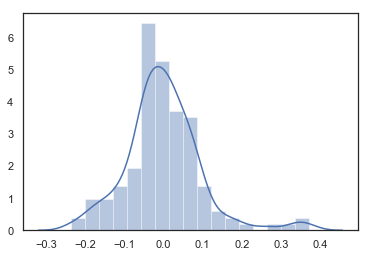

In [182]:
# Plotting the histogram of the error terms
res = y_train-y_train_pred
sns.distplot(res)

In [183]:
car_vars = ['carwidth', 'carlength', 'wheelbase', 'curbweight', 'horsepower','enginesize','boreratio','price']

df_test[car_vars] = scaler.transform(df_test[car_vars])

df_test.head()

,price,carwidth,carlength,wheelbase,curbweight,horsepower,enginesize,boreratio,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
160,0.072382,0.341667,0.409756,0.313793,0.235066,0.091667,0.139623,0.404762,1,0,...,1,0,0,0,0,1,0,0,0,0
186,0.093295,0.433333,0.497561,0.368966,0.305275,0.154167,0.181132,0.404762,1,0,...,1,0,0,0,0,1,0,0,0,0
59,0.102964,0.516667,0.596748,0.420690,0.347944,0.150000,0.230189,0.563492,1,0,...,1,0,0,0,0,1,0,0,0,0
165,0.115479,0.308333,0.448780,0.272414,0.301396,0.266667,0.139623,0.444444,1,0,...,0,0,0,0,0,1,0,0,0,0
140,0.068652,0.291667,0.263415,0.231034,0.291699,0.104167,0.177358,0.746032,1,0,...,0,1,0,0,0,1,0,0,0,0


In [184]:
df_test.describe()

,price,carwidth,carlength,wheelbase,curbweight,horsepower,enginesize,boreratio,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0
mean,0.239439,0.480376,0.559481,0.437764,0.428470,0.248858,0.265673,0.556580,0.887097,0.177419,...,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0
std,0.233076,0.165440,0.189947,0.212861,0.179488,0.163376,0.162820,0.228484,0.319058,0.385142,...,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0
min,0.007763,0.183333,0.056911,0.000000,0.128394,0.016667,0.067925,-0.111111,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.092342,0.358333,0.459350,0.313793,0.305275,0.107292,0.177358,0.404762,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,0.158991,0.441667,0.547967,0.387931,0.406129,0.218750,0.226415,0.563492,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,0.317243,0.516667,0.719919,0.570690,0.564876,0.295833,0.316038,0.746032,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,1.112855,0.975000,1.089431,1.182759,0.935609,0.662500,0.932075,0.888889,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [185]:
y_test = df_test.pop('price')
X_test = df_test

In [193]:
X_train_sm.columns

Index(['const', 'horsepower', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_wagon', 'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcf',
       'cylindernumber_five', 'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [194]:
X_train_new = X_train_sm.drop(['const'], axis=1)

In [195]:
X_train_new.columns

Index(['horsepower', 'carbody_hardtop', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcf',
       'cylindernumber_five', 'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [196]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,5.52
4,drivewheel_rwd,2.66
5,enginetype_ohc,1.98
8,cylindernumber_six,1.90
2,carbody_hatchback,1.65
6,enginetype_ohcf,1.27
9,cylindernumber_twelve,1.27
7,cylindernumber_five,1.25
3,carbody_wagon,1.24
1,carbody_hardtop,1.10


In [197]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [199]:
# Making predictions
y_pred = lr_model.predict(X_test_new)

In [200]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6553042879205232